In [1]:
import xarray as xr
import os
import numpy as np
from netCDF4 import Dataset
from copy import deepcopy
import sys
sys.path.append('C:/Users/shjo/Bridge/JNUpack/mySO_src/libs/')
from myTools import NearesND

wnpth='J:/myCORA_1rg_196001_202212_ts.nc'
pth='D:/CORA/Grid/'
cora_temp_lst=list(np.sort([pth+i for i in os.listdir(pth) if i.endswith('TEMP.nc')]))
cora_salt_lst=list(np.sort([pth+i for i in os.listdir(pth) if i.endswith('PSAL.nc')]))


In [2]:
Sample=xr.open_dataset(cora_temp_lst[0])
LAT,LON=Sample.latitude.values,Sample.longitude.values
DEPTH=Sample.depth.values
posi_co,nega_co=np.where(LON>=0)[0],np.where(LON<0)[0]
LON_re=np.concatenate( [LON[posi_co],LON[nega_co]+360],axis=0 )

myLAT=np.arange(-77,80,1 )
myLON=np.arange(0.5,360,1)


c:\Users\shjo\miniconda3\envs\nemo_env\lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [ ]:
xr.open_mfdataset(cora_temp_lst).time

In [3]:
temp_re=np.zeros([len(cora_temp_lst),len(DEPTH),len(myLAT),len(myLON)])
# salt_re=np.zeros_like(temp_re)

for temp_,salt_,nn in zip(cora_temp_lst,cora_salt_lst,range(len(cora_temp_lst))):
    if nn%30==0:
        print(nn)
    temp,salt=Dataset(temp_)['TEMP'][:],Dataset(salt_)['PSAL'][:]
    temp=np.concatenate( [temp[:,:,:,posi_co], temp[:,:,:,nega_co]] ,axis=3).squeeze()
    # salt=np.concatenate( [salt[:,:,:,posi_co], salt[:,:,:,nega_co]] ,axis=3).squeeze()
    for nd in range(len(DEPTH)):
        temp_re[nn,nd] = NearesND(LON_re, LAT, temp[nd], myLON, myLAT)
        # salt_re[nn,nd] = NearesND(LON_re, LAT, salt[nd], myLON, myLAT)



0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720


In [30]:
print('!!! Writing data... !!!')
def myOGCM(nc_save_name,LON,LAT,DEPTH,TIME,Ref_time,values1):
    
    ncfile = Dataset(nc_save_name,mode='w',format='NETCDF4')

    ncfile.createDimension('lat', len(LAT))
    ncfile.createDimension('lon', len(LON))
    ncfile.createDimension('depth',len(DEPTH))
    ncfile.createDimension('time',len(TIME))
    
    ncfile.title='My IAP data '
    
    lat = ncfile.createVariable('lat', np.float32, ('lat',))
    lat.units = 'degrees_north'
    lon = ncfile.createVariable('lon', np.float32, ('lon',))
    lon.units = 'degrees_east'
    depth = ncfile.createVariable('depth', np.float32, ('depth',))
    depth.units = 'depth_m'
    time = ncfile.createVariable('time', np.float64, ('time',))
    time.units=Ref_time
    time.field='time, scalar, series'
    # time.cycle_length=cycle
    
    DATA1 = ncfile.createVariable('temp',np.float64,('time','depth','lat','lon'),compression='zlib') #
    DATA1.units = 'degree_C' 
    DATA1.long_name = 'IAP temp' 
    DATA1.coordinates = "time, depth, lat, lon"
    
    # Data.field=Var.field
    lat[:] = LAT
    lon[:] = LON
    depth[:]= DEPTH
    time[:] = TIME 
     
    DATA1[:] = values1
    ncfile.close()

myOGCM(wnpth,LON,LAT,DEPTH,TIME,Ref_time,temp)

10

390.0


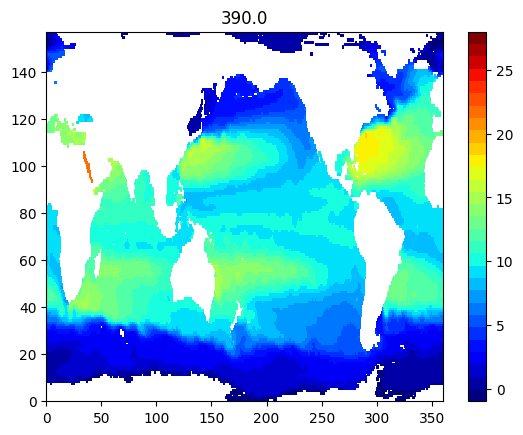

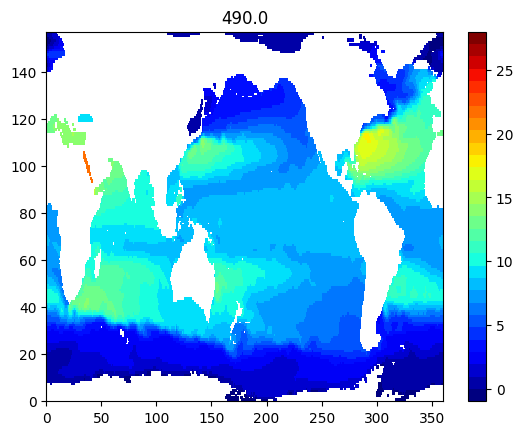

In [24]:
# import matplotlib.pyplot as plt
# temp_re[temp_re>100]=np.nan
N=50
print(DEPTH[N])

plt.figure(1)
plt.title(str(DEPTH[N]))
plt.pcolor(temp_re[2,N,:,:],vmin=-1,vmax=28,cmap=plt.get_cmap('jet',30))
plt.colorbar()
plt.show()

plt.figure(2)
plt.title(str(DEPTH[N+10]))
plt.pcolor(temp_re[2,N+10,:,:],vmin=-1,vmax=28,cmap=plt.get_cmap('jet',30))
plt.colorbar()
plt.show()